In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score,accuracy_score,f1_score,ConfusionMatrixDisplay,recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import tqdm
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',400)

In [2]:
# Load data into the notebook
data = pd.read_excel('Dataset.xlsx')

* Explore data 

In [3]:
data.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,SubscriptionDetails,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...","{'Plan': 'Express', 'Start_Date': '2020-06-08'...","[{'Type': 'Call', 'Date': '2019-09-26'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ...",3,1,2020-01-27 01:36:49
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...","{'Plan': 'Pro', 'Start_Date': '2021-07-21', 'E...","[{'Type': 'Call', 'Date': '2020-01-05'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 3}...","{'PageViews': 100, 'TimeSpent(minutes)': 9}","[{'Action': 'Add to Cart', 'Page': 'homepage',...","{'Logins': 9, 'Frequency': 'Weekly'}","{'Rating': 2, 'Comment': 'Wish what bag cut li...","[{'Email_Sent': '2021-08-02', 'Email_Opened': ...",6,0,2019-01-06 18:30:03
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...","{'Plan': 'Essential', 'Start_Date': '2019-10-0...","[{'Type': 'Email', 'Date': '2019-10-09'}, {'Ty...","[{'Method': 'Credit Card', 'Late_Payments': 1}...","{'PageViews': 1, 'TimeSpent(minutes)': 97}","[{'Action': 'Search', 'Page': 'terms', 'Timest...","{'Logins': 19, 'Frequency': 'Monthly'}","{'Rating': 4, 'Comment': 'Some Democrat guess ...","[{'Email_Sent': '2021-08-29', 'Email_Opened': ...",3,0,2019-04-30 04:25:10
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...","{'Plan': 'Smart', 'Start_Date': '2020-01-14', ...","[{'Type': 'Call', 'Date': '2020-08-28'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 36...","{'PageViews': 25, 'TimeSpent(minutes)': 31}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 4, 'Frequency': 'Daily'}","{'Rating': 1, 'Comment': 'Yard feel never miss...","[{'Email_Sent': '2021-02-03', 'Email_Opened': ...",1,1,2020-03-03 17:33:28
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...","{'Plan': 'Basic', 'Start_Date': '2021-04-08', ...","[{'Type': 'Call', 'Date': '2019-04-10'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 0}...","{'PageViews': 77, 'TimeSpent(minutes)': 51}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 12, 'Frequency': 'Weekly'}","{'Rating': 3, 'Comment': 'Ten determine unit i...","[{'Email_Sent': '2022-03-11', 'Email_Opened': ...",3,0,2019-04-05 22:42:22


In [4]:
## Check for missing data 
data.isnull().sum().any()

False

In [5]:
# statistical exploration of the data 
data.describe()

,CustomerID,Age,NPS,ChurnLabel
count,12483.00000,12483.000000,12483.000000,12483.000000
mean,7242.00000,43.930065,2.973884,0.505808
std,3603.67604,15.341521,2.644623,0.499986
min,1001.00000,18.000000,0.000000,0.000000
25%,4121.50000,31.000000,1.000000,0.000000
50%,7242.00000,44.000000,2.000000,1.000000
75%,10362.50000,57.000000,4.000000,1.000000
max,13483.00000,70.000000,9.000000,1.000000


In [6]:
data.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location', 'Email', 'Phone',
       'Address', 'Segment', 'PurchaseHistory', 'SubscriptionDetails',
       'ServiceInteractions', 'PaymentHistory', 'WebsiteUsage',
       'ClickstreamData', 'EngagementMetrics', 'Feedback',
       'MarketingCommunication', 'NPS', 'ChurnLabel', 'Timestamp'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12483 entries, 0 to 12482
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              12483 non-null  int64 
 1   Name                    12483 non-null  object
 2   Age                     12483 non-null  int64 
 3   Gender                  12483 non-null  object
 4   Location                12483 non-null  object
 5   Email                   12483 non-null  object
 6   Phone                   12483 non-null  object
 7   Address                 12483 non-null  object
 8   Segment                 12483 non-null  object
 9   PurchaseHistory         12483 non-null  object
 10  SubscriptionDetails     12483 non-null  object
 11  ServiceInteractions     12483 non-null  object
 12  PaymentHistory          12483 non-null  object
 13  WebsiteUsage            12483 non-null  object
 14  ClickstreamData         12483 non-null  object
 15  En

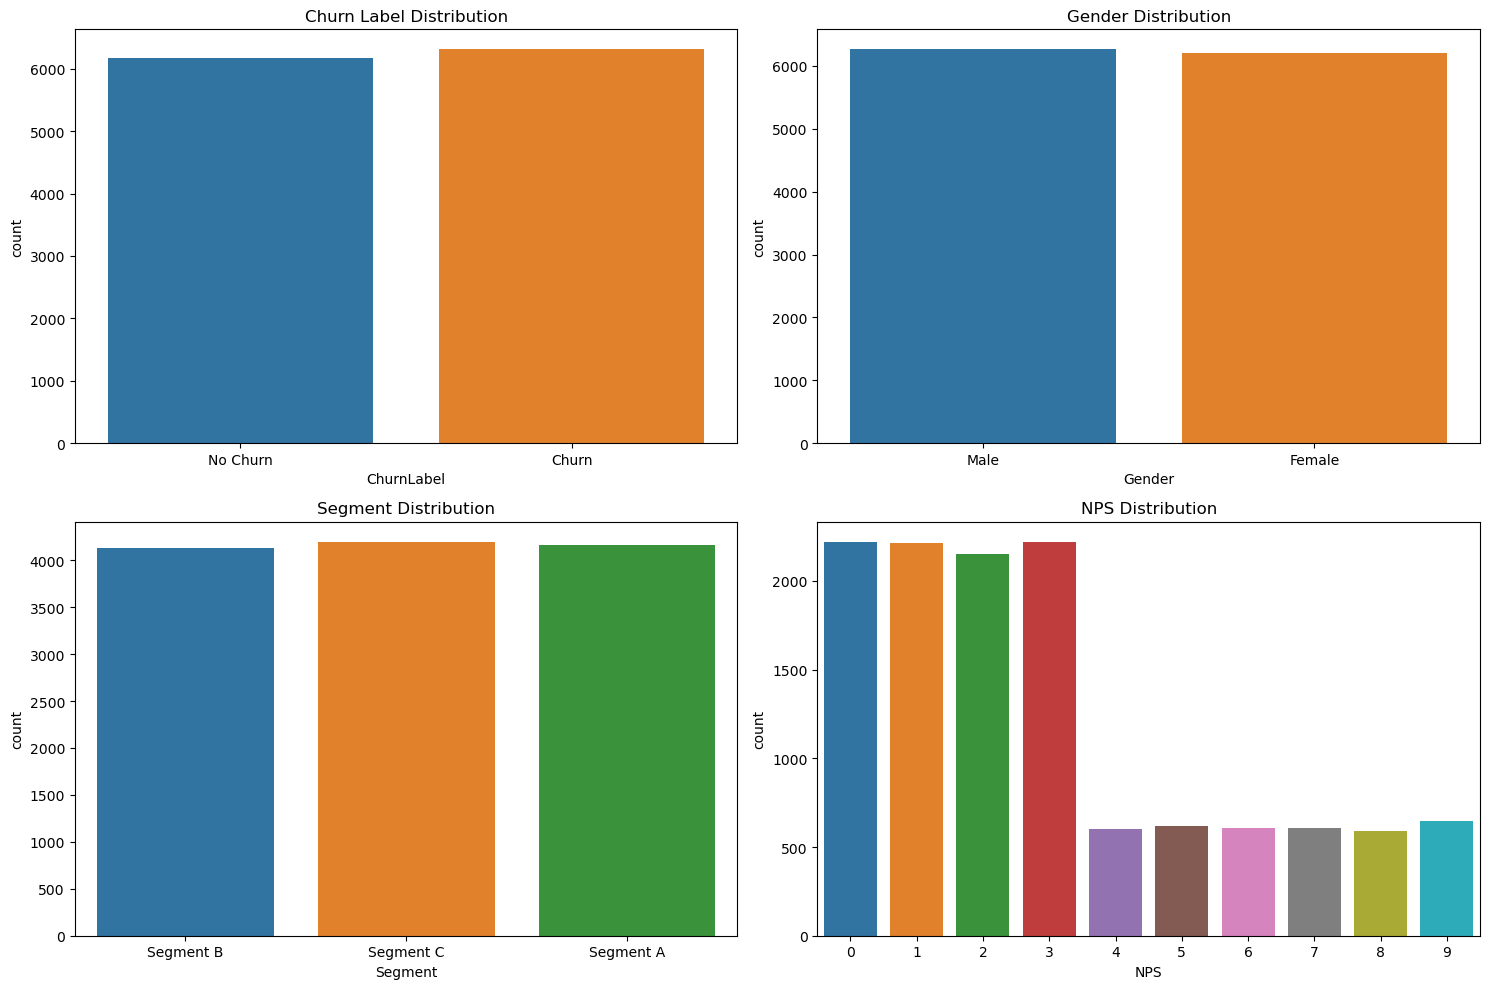

In [8]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize= (15,10))
sns.countplot(x='ChurnLabel',data=data,ax=ax[0,0])
ax[0,0].set_title('Churn Label Distribution')
ax[0,0].set_xticklabels(['No Churn','Churn'])


# Gender distribution
sns.countplot(x='Gender',data=data,ax=ax[0,1])
ax[0,1].set_title('Gender Distribution')

# Segmment Disttribution
sns.countplot(x='Segment',data=data,ax=ax[1,0])
ax[1,0].set_title('Segment Distribution');

#NPS Distribution
sns.countplot(x='NPS',data=data,ax=ax[1,1])
ax[1,1].set_title('NPS Distribution');
#ax[1,1].set_xticklabels(['No Churn','Churn'])
plt.tight_layout();

In [9]:
# covert the timestamp from the data 
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

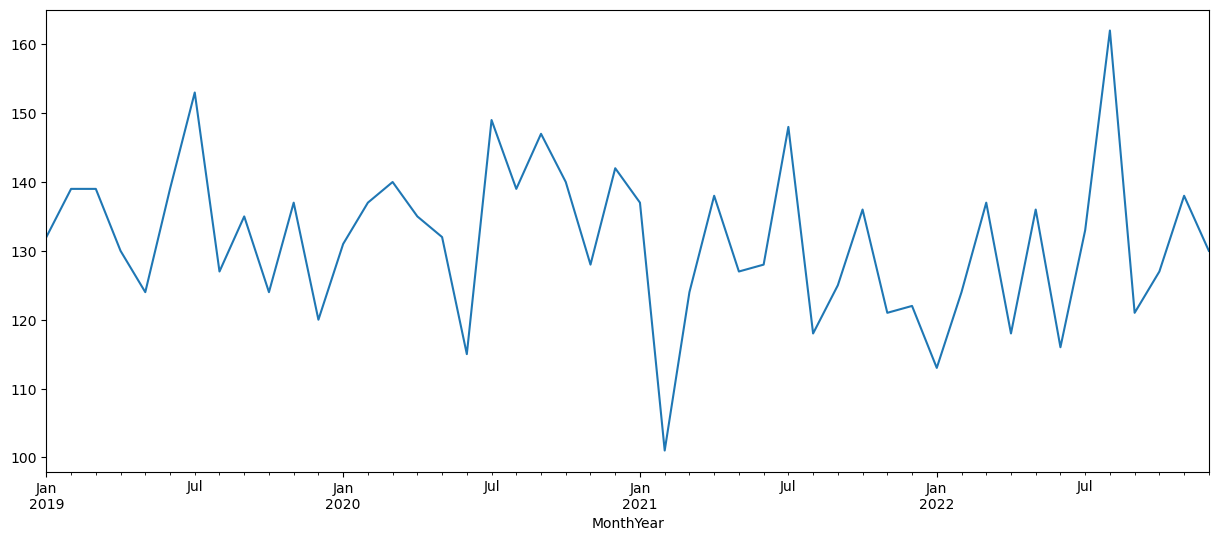

In [10]:
data['MonthYear'] = data['Timestamp'].dt.to_period('M')
churnRate = data.groupby('MonthYear')['ChurnLabel'].sum().plot(figsize=(15,6))


In [11]:
data['FeedbackRating'] = data['Feedback'].apply(lambda x: eval(x)['Rating'])

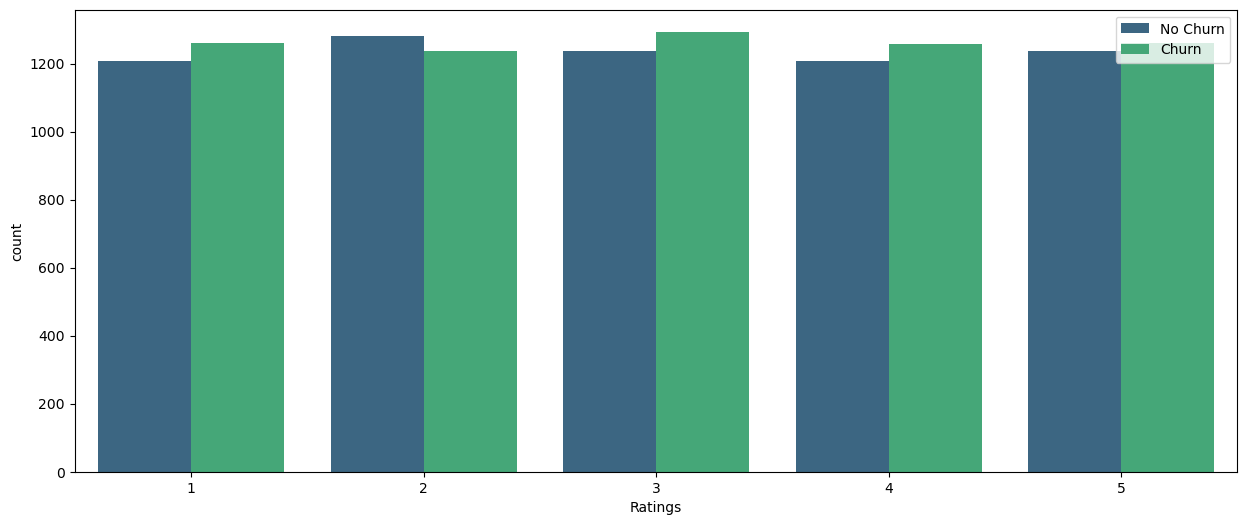

In [60]:
fig,ax = plt.subplots(figsize=(15,6))
sns.countplot(data=data,x='FeedbackRating', hue='ChurnLabel',palette='viridis',ax=ax)
plt.xlabel('Ratings')
plt.legend(loc=1,labels = ['No Churn','Churn']);

## View the nested values in some columns 

In [13]:
nested_cols= [
    'PurchaseHistory',
    'SubscriptionDetails',
    'ServiceInteractions',
    'WebsiteUsage',
    'ClickstreamData',
    'EngagementMetrics',
    'Feedback',
    'MarketingCommunication',
    'PaymentHistory'
]

d1,d2 = 25,100
for col in nested_cols:
    row = [col,data[col][0]]
    print('\n| {:<{w1}} : {:<{w2}}|'.format(*row,w1=d1,w2=d2))


| PurchaseHistory           : [{'Product': 'Frozen Cocktail Mixes', 'Frequency': 8, 'Value': 884.43}, {'Product': 'Printer, Copier & Fax Machine Accessories', 'Frequency': 7, 'Value': 397.14}, {'Product': 'Hockey Stick Care', 'Frequency': 10, 'Value': 498.92}, {'Product': 'Guacamole', 'Frequency': 2, 'Value': 718.43}, {'Product': 'Mortisers', 'Frequency': 2, 'Value': 614.08}, {'Product': 'Rulers', 'Frequency': 6, 'Value': 221.68}, {'Product': 'Invitations', 'Frequency': 3, 'Value': 660.04}]|

| SubscriptionDetails       : {'Plan': 'Express', 'Start_Date': '2020-06-08', 'End_Date': '2022-10-27'}                           |

| ServiceInteractions       : [{'Type': 'Call', 'Date': '2019-09-26'}, {'Type': 'Chat', 'Date': '2021-07-25'}, {'Type': 'Email', 'Date': '2020-04-13'}, {'Type': 'Chat', 'Date': '2020-11-15'}]|

| WebsiteUsage              : {'PageViews': 49, 'TimeSpent(minutes)': 15}                                                         |

| ClickstreamData           : [{'Action':

In [14]:
for col in nested_cols:
    data[col] = data[col].apply(literal_eval)

**Extracting some features in the nested columns** 

In [15]:
#data['Product'] =data['PurchaseHistory'].apply(lambda x :'-'.join([i['Product'] for i in x]))

In [16]:
data['SalesCount'] = data['PurchaseHistory'].apply(lambda x : sum([i['Frequency'] for i in x]))
data['TotalSales'] = data['PurchaseHistory'].apply(lambda x : sum([i['Value'] for i in x]))

In [17]:
data['SubscriptionPlan'] = data['SubscriptionDetails'].apply(lambda x : x['Plan'])

In [18]:
data['SubscriptionStartDate'] = data['SubscriptionDetails'].apply(lambda x : x['Start_Date'])
data['SubscriptionEndDate'] = data['SubscriptionDetails'].apply(lambda x : x['End_Date'])
data['SubscriptionDuration'] = (pd.to_datetime(data['SubscriptionEndDate']) - pd.to_datetime(data['SubscriptionStartDate'])).dt.days

In [19]:
# Extract website usage interaction 
data['Website_PageViews']=data['WebsiteUsage'].apply(lambda x :x['PageViews'])
data['WebsiteTImeSpent(minutes)'] = data['WebsiteUsage'].apply(lambda x: x['TimeSpent(minutes)'])

## Extract the late payment history data

In [20]:
data['PaymentHistoryNoOfLatePayment'] =data['PaymentHistory'].apply(lambda x: sum([i['Late_Payments'] for i in x]))
data['PaymentHistoryAvgNoOfLatePayment'] = data['PaymentHistory'].apply(lambda x : np.average([i['Late_Payments'] for i in x]))

## Extract the markeking Communication data 

In [21]:
data['MarketingCommunicationClickedOpenedDiff'] = data['MarketingCommunication'].apply(lambda x :np.mean([(pd.to_datetime(i['Email_Clicked'])
                                               - pd.to_datetime(i['Email_Opened'])).days for i in x]))
data['MarketingCommunicationOpenedSentDiff'] = data['MarketingCommunication'].apply(lambda x :np.mean([(pd.to_datetime(i['Email_Opened'])
                                               - pd.to_datetime(i['Email_Sent'])).days for i in x]))
data['MarketingNoOfEmail'] = data['MarketingCommunication'].apply(lambda x :len(x))

In [22]:
service_interaction_type = data['ServiceInteractions'].apply(lambda x:list(set([i['Type']for i in x])))
service_interaction_type_list =service_interaction_type.to_list()
unique_service_interaction_type = []
for type in service_interaction_type:
    unique_service_interaction_type.extend(type)
unique_service_interaction_type= list(set(unique_service_interaction_type))
print('The unique service interaction type are :',unique_service_interaction_type)

The unique service interaction type are : ['Chat', 'Email', 'Call']


In [23]:
for usit in unique_service_interaction_type:
    data[f'ServiceInteractions_{usit}'] = data['ServiceInteractions'].apply(lambda x : len([i for i in x if i['Type']== usit]))

### Extract the Engagement frequencies

In [24]:
data['EngagementMetricsFrequency'] =data['EngagementMetrics'].apply(lambda x:x['Frequency'])
data['EngagementMetricsLogins'] =data['EngagementMetrics'].apply(lambda x:x['Logins'])

## Extract the Click Stream Data 


In [25]:
# Extract the unique click stream action
click__strean_data_action = data['ClickstreamData'].apply(lambda x : list(set([i['Action'] for i in x])))
click__strean_data_action = click__strean_data_action.to_list()
unique_click_stream_data_action = []
for action in click__strean_data_action:
    unique_click_stream_data_action.extend(action)
unique_click_stream_data_action = list(set(unique_click_stream_data_action))
print('The unique click strean data action: ',unique_click_stream_data_action) 

# Extract the unique click stream data page
click_stream_data_page =data['ClickstreamData'].apply(lambda x : list(set([i['Page'] for i in x])))
click_stream_data_page_list = click_stream_data_page.to_list()

unique_click_stream_data_page = []

for page in click_stream_data_page_list:
    unique_click_stream_data_page.extend(page)

unique_click_stream_data_page = list(set(unique_click_stream_data_page))
print('\nThe unique click strean data page: ',unique_click_stream_data_page) 

The unique click strean data action:  ['Search', 'Click', 'Add to Cart']

The unique click strean data page:  ['search', 'faq', 'author', 'about', 'main', 'register', 'post', 'category', 'login', 'terms', 'homepage', 'index', 'home', 'privacy']


In [26]:
# Extract the action of the Click Stream Data 
for csda in unique_click_stream_data_action:
    data[f'ClickstreamData_{csda}'] = data['ClickstreamData'].apply(lambda x : len([i for i in x if i['Action']==csda]))
    
# Extarct the page feature from click stream data
for csdp in unique_click_stream_data_page:
    data[f'ClickstreamData_{csdp}'] = data['ClickstreamData'].apply(lambda x : len([i for i in x if i['Page'] == csdp]))

In [27]:
data.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,SubscriptionDetails,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp,MonthYear,FeedbackRating,SalesCount,TotalSales,SubscriptionPlan,SubscriptionStartDate,SubscriptionEndDate,SubscriptionDuration,Website_PageViews,WebsiteTImeSpent(minutes),PaymentHistoryNoOfLatePayment,PaymentHistoryAvgNoOfLatePayment,MarketingCommunicationClickedOpenedDiff,MarketingCommunicationOpenedSentDiff,MarketingNoOfEmail,ServiceInteractions_Chat,ServiceInteractions_Email,ServiceInteractions_Call,EngagementMetricsFrequency,EngagementMetricsLogins,ClickstreamData_Search,ClickstreamData_Click,ClickstreamData_Add to Cart,ClickstreamData_search,ClickstreamData_faq,ClickstreamData_author,ClickstreamData_about,ClickstreamData_main,ClickstreamData_register,ClickstreamData_post,ClickstreamData_category,ClickstreamData_login,ClickstreamData_terms,ClickstreamData_homepage,ClickstreamData_index,ClickstreamData_home,ClickstreamData_privacy
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...","{'Plan': 'Express', 'Start_Date': '2020-06-08'...","[{'Type': 'Call', 'Date': '2019-09-26'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ...",3,1,2020-01-27 01:36:49,2020-01,1,38,3994.72,Express,2020-06-08,2022-10-27,871,49,15,40,13.333333,319.0,818.0,8,2,1,1,Weekly,19,12,4,8,2,2,2,5,3,1,1,0,2,1,1,1,1,2
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...","{'Plan': 'Pro', 'Start_Date': '2021-07-21', 'E...","[{'Type': 'Call', 'Date': '2020-01-05'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 3}...","{'PageViews': 100, 'TimeSpent(minutes)': 9}","[{'Action': 'Add to Cart', 'Page': 'homepage',...","{'Logins': 9, 'Frequency': 'Weekly'}","{'Rating': 2, 'Comment': 'Wish what bag cut li...","[{'Email_Sent': '2021-08-02', 'Email_Opened': ...",6,0,2019-01-06 18:30:03,2019-01,2,4,2844.35,Pro,2021-07-21,2022-05-07,290,100,9,10,3.333333,88.0,110.0,9,4,10,5,Weekly,9,7,9,8,3,3,0,2,2,1,2,2,1,1,3,1,2,1
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...","{'Plan': 'Essential', 'Start_Date': '2019-10-0...","[{'Type': 'Email', 'Date': '2019-10-09'}, {'Ty...","[{'Method': 'Credit Card', 'Late_Payments': 1}...","{'PageViews': 1, 'TimeSpent(minutes)': 97}","[{'Action': 'Search', 'Page': 'terms', 'Timest...","{'Logins': 19, 'Frequency': 'Monthly'}","{'Rating': 4, 'Comment': 'Some Democrat guess ...","[{'Email_Sent': '2021-08-29', 'Email_Opened': ...",3,0,2019-04-30 04:25:10,2019-04,4,14,1866.52,Essential,2019-10-05,2020-08-19,319,1,97,8,2.666667,117.0,333.0,8,1,1,1,Monthly,19,7,3,2,1,0,2,2,2,1,0,0,1,3,0,0,0,0
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...","{'Plan': 'Smart', 'Start_Date': '2020-01-14', ...","[{'Type': 'Call', 'Date': '2020-08-28'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 36...","{'PageViews': 25, 'TimeSpent(minutes)': 31}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 4, 'Frequency': 'Daily'}","{'Rating': 1, 'Comment': 'Yard feel never miss...","[{'Email_Sent': '2021-02-03', 'Email_Opened': ...",1,1,2020-03-03 17:33:28,2020-03,1,28,1378.64,Smart,2020-01-14,2022-03-27,803,25,31,79,2

In [28]:
data.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location', 'Email', 'Phone',
       'Address', 'Segment', 'PurchaseHistory', 'SubscriptionDetails',
       'ServiceInteractions', 'PaymentHistory', 'WebsiteUsage',
       'ClickstreamData', 'EngagementMetrics', 'Feedback',
       'MarketingCommunication', 'NPS', 'ChurnLabel', 'Timestamp', 'MonthYear',
       'FeedbackRating', 'SalesCount', 'TotalSales', 'SubscriptionPlan',
       'SubscriptionStartDate', 'SubscriptionEndDate', 'SubscriptionDuration',
       'Website_PageViews', 'WebsiteTImeSpent(minutes)',
       'PaymentHistoryNoOfLatePayment', 'PaymentHistoryAvgNoOfLatePayment',
       'MarketingCommunicationClickedOpenedDiff',
       'MarketingCommunicationOpenedSentDiff', 'MarketingNoOfEmail',
       'ServiceInteractions_Chat', 'ServiceInteractions_Email',
       'ServiceInteractions_Call', 'EngagementMetricsFrequency',
       'EngagementMetricsLogins', 'ClickstreamData_Search',
       'ClickstreamData_Click', 'ClickstreamData_Add to C

In [29]:
# Extract the important 
new_data = data[[
     'Age','Gender','NPS','ChurnLabel','FeedbackRating', 'SalesCount', 'TotalSales', 'SubscriptionPlan',
        'SubscriptionDuration','Website_PageViews', 'WebsiteTImeSpent(minutes)',
       'PaymentHistoryNoOfLatePayment', 'PaymentHistoryAvgNoOfLatePayment',
       'MarketingCommunicationClickedOpenedDiff',
       'MarketingCommunicationOpenedSentDiff', 'MarketingNoOfEmail',
       'ServiceInteractions_Call', 'ServiceInteractions_Chat',
       'ServiceInteractions_Email', 'EngagementMetricsFrequency',
       'EngagementMetricsLogins', 'ClickstreamData_Add to Cart',
       'ClickstreamData_Search', 'ClickstreamData_Click'
]]

In [30]:
new_data.loc[0]

Age                                               31
Gender                                          Male
NPS                                                3
ChurnLabel                                         1
FeedbackRating                                     1
SalesCount                                        38
TotalSales                                   3994.72
SubscriptionPlan                             Express
SubscriptionDuration                             871
Website_PageViews                                 49
WebsiteTImeSpent(minutes)                         15
PaymentHistoryNoOfLatePayment                     40
PaymentHistoryAvgNoOfLatePayment           13.333333
MarketingCommunicationClickedOpenedDiff        319.0
MarketingCommunicationOpenedSentDiff           818.0
MarketingNoOfEmail                                 8
ServiceInteractions_Call                           1
ServiceInteractions_Chat                           2
ServiceInteractions_Email                     

In [31]:
new_data[['Gender','EngagementMetricsFrequency','SubscriptionPlan']].nunique()

Gender                         2
EngagementMetricsFrequency     3
SubscriptionPlan              20
dtype: int64

## Encoding String Parameters

In [32]:
# Encoding gender 
gender_map = {'Male':1,'Female':0}

# Encoding Engagement frequency 
engagement_metric_frequency = new_data['EngagementMetricsFrequency'].unique()
engagement_metric_frequnecy_map = {engagement_metric_frequency[i] : i for i in range(len(engagement_metric_frequency))}

# Encoding the subscription Plan
subscription_plan = new_data['SubscriptionPlan'].unique()
subscription_plan_map = {subscription_plan[i]: i for i in range(len(subscription_plan))}


# Map the dictionery to the colums 
new_data['Gender'] = new_data['Gender'].map(gender_map)
new_data['EngagementMetricsFrequency'] = new_data['EngagementMetricsFrequency'].map(engagement_metric_frequnecy_map)
new_data['SubscriptionPlan'] = new_data['SubscriptionPlan'].map(subscription_plan_map)

In [33]:
new_data.head() # View the data to see the new mapping data 

,Age,Gender,NPS,ChurnLabel,FeedbackRating,SalesCount,TotalSales,SubscriptionPlan,SubscriptionDuration,Website_PageViews,WebsiteTImeSpent(minutes),PaymentHistoryNoOfLatePayment,PaymentHistoryAvgNoOfLatePayment,MarketingCommunicationClickedOpenedDiff,MarketingCommunicationOpenedSentDiff,MarketingNoOfEmail,ServiceInteractions_Call,ServiceInteractions_Chat,ServiceInteractions_Email,EngagementMetricsFrequency,EngagementMetricsLogins,ClickstreamData_Add to Cart,ClickstreamData_Search,ClickstreamData_Click
0,31,1,3,1,1,38,3994.72,0,871,49,15,40,13.333333,319.0,818.0,8,1,2,1,0,19,8,12,4
1,66,0,6,0,2,4,2844.35,1,290,100,9,10,3.333333,88.0,110.0,9,5,4,10,0,9,8,7,9
2,36,0,3,0,4,14,1866.52,2,319,1,97,8,2.666667,117.0,333.0,8,1,1,1,1,19,2,7,3
3,62,0,1,1,1,28,1378.64,3,803,25,31,79,26.333333,423.0,159.0,10,17,24,18,2,4,15,16,16
4,68,0,3,0,3,39,2425.05,4,580,77,51,2,0.666667,96.0,193.0,7,4,1,5,0,12,17,4,9


## View the correlation of the feature with the lable 


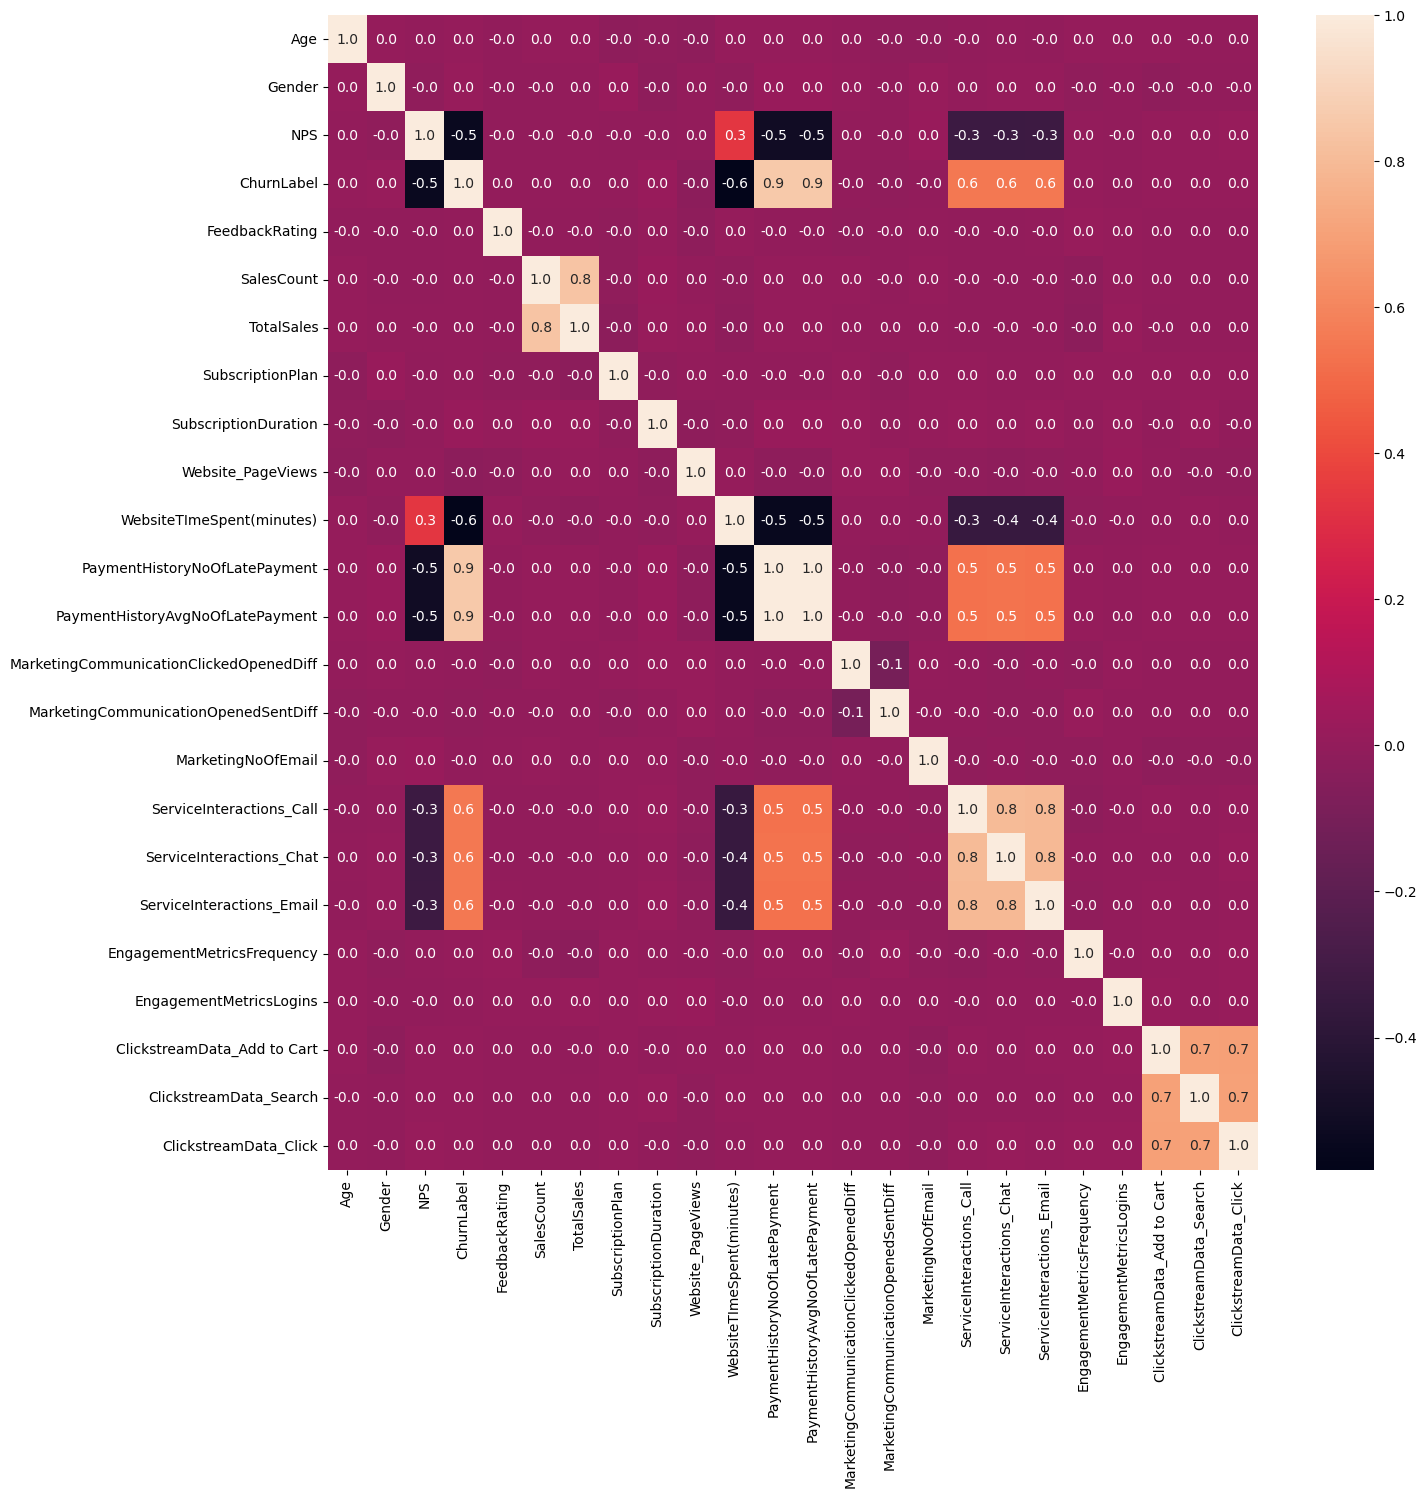

In [34]:
fig , ax = plt.subplots(figsize=(15,15))
sns.heatmap(new_data.corr(),fmt='.1f',annot=True,ax=ax)
plt.show()

## Split the data into training , validation and test data

In [35]:
target = 'ChurnLabel'
X = new_data.drop(target,axis=1)
y = new_data[target]
X_train,X_other,y_train,y_other = train_test_split(X,y,train_size=.8,random_state=42)
X_test,X_val,y_test,y_val = train_test_split(X_other,y_other,test_size=.3, random_state=42)

In [36]:
X_train.shape,X_test.shape,X_val.shape

((9986, 23), (1747, 23), (750, 23))

In [37]:
# Standardize the data 
ss = StandardScaler()
X_train =ss.fit_transform(X_train)
X_test = ss.transform(X_test)
X_val = ss.transform(X_val)

##  Building the model and Evalauting the model 


In [41]:
# build a function to evaluate the the model

def evaluate(X_true,y_true,model,subset=''):
    y_pred = model.predict(X_true)
    print(f'{subset} Accuracing Score: {accuracy_score(y_true =y_true,y_pred=y_pred)}')
    print(f'{subset} Precision Score: {precision_score(y_true=y_true,y_pred=y_pred)}')
    print(f'{subset} F1 Score: {f1_score(y_true=y_true,y_pred=y_pred)}')
    print(f'{subset} Recall Score: {recall_score(y_true=y_true,y_pred=y_pred)}')
   


In [44]:
# buld and train the logistics model
model_lr = LogisticRegression()
model_lr.fit(X=X_train,y=y_train)

evaluate(X_true=X_train,y_true=y_train,model=model_lr,subset='Training')
print('\n\n')
# validating the model with the validation data
evaluate(X_true=X_val,y_true=y_val,model=model_lr,subset='Validation')


Training Accuracing Score: 0.9709593430803124
Training Precision Score: 0.9767071471232331
Training F1 Score: 0.9712928133042962
Training Recall Score: 0.965938176806458



Validation Accuracing Score: 0.968
Validation Precision Score: 0.9643835616438357
Validation F1 Score: 0.967032967032967
Validation Recall Score: 0.9696969696969697


In [46]:
# build the decision tree classifier model
model_dc = DecisionTreeClassifier(max_depth=6)
model_dc.fit(X=X_train,y=y_train)

# traing the model with the vslidation data  
evaluate(X_true=X_train,y_true=y_train,model=model_dc,subset='Train')
print('\n\n')
#evaluate the model with the validation data 
evaluate(X_true=X_val,y_true=y_val,model=model_dc,subset='Validating')

Train Accuracing Score: 0.9770678950530743
Train Precision Score: 0.9777383766745469
Train F1 Score: 0.977449532250123
Train Recall Score: 0.9771608584367001



Validating Accuracing Score: 0.9666666666666667
Validating Precision Score: 0.9617486338797814
Validating F1 Score: 0.9657064471879286
Validating Recall Score: 0.9696969696969697


## Test the data with the test data 

In [48]:
#
evaluate(X_true=X_test,y_true=y_test,model=model_dc,subset='Test')
print('\n\n')
evaluate(X_true=X_test,y_true=y_test,model=model_lr,subset='Test')

Test Accuracing Score: 0.9725243274184316
Test Precision Score: 0.9724770642201835
Test F1 Score: 0.9724770642201835
Test Recall Score: 0.9724770642201835



Test Accuracing Score: 0.9690898683457355
Test Precision Score: 0.9733796296296297
Test F1 Score: 0.9688940092165897
Test Recall Score: 0.9644495412844036


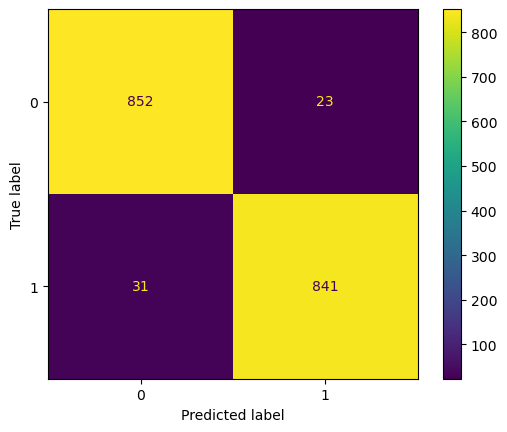

In [58]:
# using a grapgh to view the accuracing of the model
y_pred = model_lr.predict(X_test)
lr_confusion_matrix=confusion_matrix(y_true=y_test,y_pred=y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=lr_confusion_matrix)
display.plot()
plt.title('Predictions of Logistics Regression model')
plt.show()

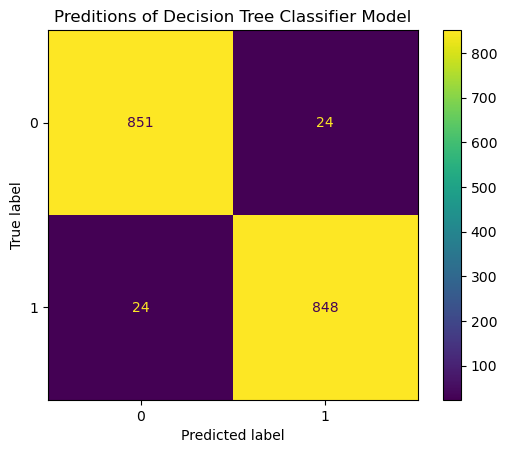

In [59]:
# using a grapgh to view the accuracing of the model
y_pred = model_dc.predict(X_test)
lr_confusion_matrix=confusion_matrix(y_true=y_test,y_pred=y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=lr_confusion_matrix)
display.plot()
plt.title('Preditions of Decision Tree Classifier Model')
plt.show()

# Conclusion 
-  LogisticRegression model has a lower scores results on the test data
-  DecisionTreeClassifier mmodel predicts slightly more True negative than Logistics Regression

## The import feature the influence the custumers churn are as follow
- Net processes Service 
- PaymentHistory_NOofLatePayemnt
- PaymentHistory_AvgNOofLatePayemnt
- WebsiteTImeSpent(minutes)
- ServiceInteraction_Call
- ServiceInteraction_Chat
- ServiceInteraction_Email